# KPCA

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Dataset

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(100, factor=.1, noise=.1)

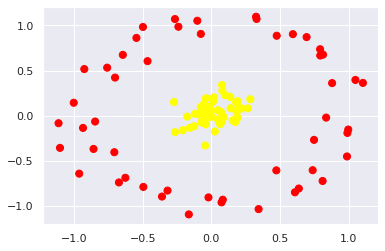

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.show()

## Implementando o modelo

In [5]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### *Grid Search* custmomizado

In [6]:
gamma_accuracy = {}
kernels = ['rbf', 'poly', 'sigmoid']
# gammas = np.logspace(-2, 1, 10)
gammas = np.linspace(0, 1, 10)
for k in kernels:
    for g in gammas:
        kpca = KernelPCA(n_components=2, kernel=k, gamma=g)
        X_kpca = kpca.fit_transform(X)
        clf = LogisticRegression(random_state=42)
        clf.fit(X_kpca, y)
        y_pred = clf.predict(X_kpca)
        gamma_accuracy[(k, g)] = accuracy_score(y, y_pred)

melhores_parametros = max(gamma_accuracy, key=gamma_accuracy.get)
print('Melhor separabilidade')
print(f'Kernel: {melhores_parametros[0]}\nGamma: {melhores_parametros[1]}')
print(f'Acurácia: {gamma_accuracy[melhores_parametros]}')

Melhor separabilidade
Kernel: rbf
Gamma: 0.8888888888888888
Acurácia: 1.0


### Visualização

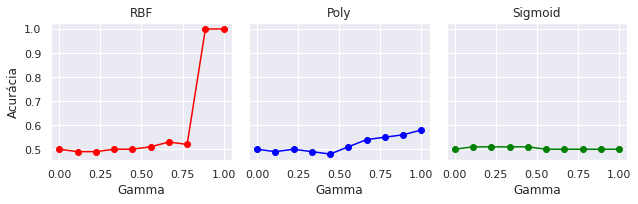

In [7]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(9, 3))

ax[0].plot(gammas, [gamma_accuracy[('rbf', g)] for g in gammas], '-o', color='red')
ax[1].plot(gammas, [gamma_accuracy[('poly', g)] for g in gammas], '-o', color='blue')
ax[2].plot(gammas, [gamma_accuracy[('sigmoid', g)] for g in gammas], '-o', color='green')

ax[0].title.set_text('RBF')
ax[0].set_ylabel('Acurácia')
ax[0].set_xlabel('Gamma')
ax[1].title.set_text('Poly')
ax[1].set_xlabel('Gamma')
ax[2].title.set_text('Sigmoid')
ax[2].set_xlabel('Gamma')

plt.tight_layout()
plt.show()

In [8]:
# KPCA com os melhores resultados
X_kpca = KernelPCA(
    n_components=2, 
    kernel=melhores_parametros[0], 
    gamma=melhores_parametros[1]
).fit_transform(X)
clf = LogisticRegression(random_state=42)
clf.fit(X_kpca, y)
y_pred = clf.predict(X_kpca)

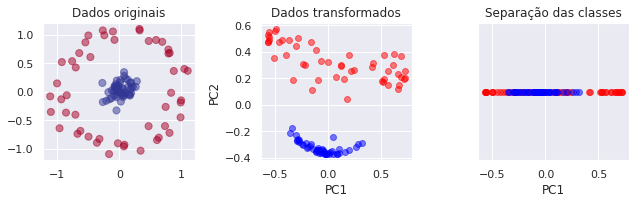

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)
ax[2].scatter(X_kpca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
ax[2].scatter(X_kpca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

ax[0].title.set_text('Dados originais')
ax[1].title.set_text('Dados transformados')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[2].title.set_text('Separação das classes')
ax[2].set_ylim([-1, 1])
ax[2].set_yticks([])
ax[2].set_xlabel('PC1')

plt.tight_layout()
plt.show()

### Avaliando o modelo

In [10]:
from sklearn.metrics import confusion_matrix

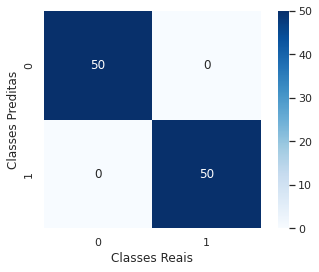

In [11]:
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas'); 

## Redução de dimensionalidade

### PCA

In [12]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

#### Visualização

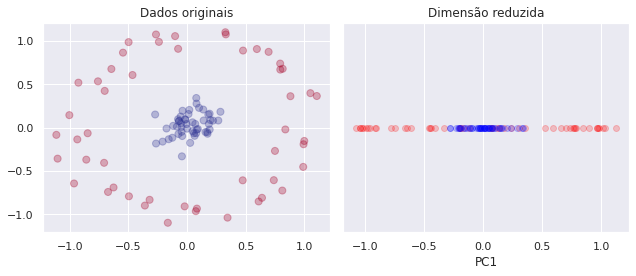

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu', alpha=0.3)
ax[1].scatter(X_pca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.2)
ax[1].scatter(X_pca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.2)

ax[0].title.set_text('Dados originais')
ax[1].title.set_text('Dimensão reduzida')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

#### Avaliando o modelo

In [14]:
clf = LogisticRegression(random_state=42)
clf.fit(X_pca, y)
y_pred = clf.predict(X_pca)
print(f'Acurácia: {accuracy_score(y, y_pred)}')

Acurácia: 0.51


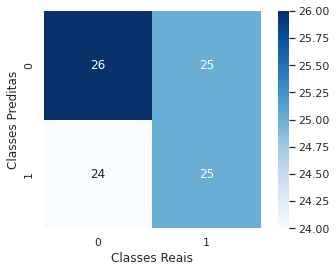

In [15]:
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas'); 

### LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [17]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

#### Visualização

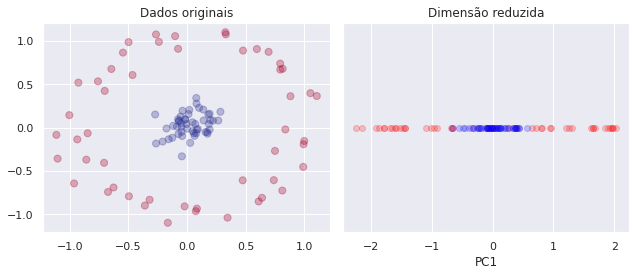

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlBu', alpha=0.3)
ax[1].scatter(X_lda[y==0, 0], np.zeros((50,1)), color='red', alpha=0.2)
ax[1].scatter(X_lda[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.2)

ax[0].title.set_text('Dados originais')
ax[1].title.set_text('Dimensão reduzida')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

#### Avaliando o modelo

In [19]:
clf = LogisticRegression(random_state=42)
clf.fit(X_lda, y)
y_pred = clf.predict(X_lda)
print(f'Acurácia: {accuracy_score(y, y_pred)}')

Acurácia: 0.5


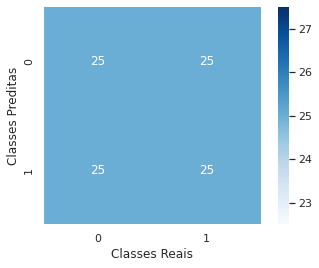

In [20]:
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas'); 